![example](images/director_shot.jpeg)

# Project Title

**Authors:** Clara Ma
***

## Overview

Explore that kinds of movie are successful on sales. Give conclusions on what movies to invest. 
1. Which production company make the highest domestic gross?
2. Which production company make the highest foreign gross?
3. What genres of movie make the highest domestic gross?
4. What genres of movie make the highest foreign gross?


Data to extract: movie genre, domestic gross, foreign gross, production company and plot the relationship with return on investment

## Business Problem

What movies we should invest?


## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [252]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [253]:
# Here you run your code to explore the data
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [254]:
dfsort = df.sort_values(by='domestic_gross',ascending=False)
dfsort.head(19)


,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [255]:
dfsort.head(99)['studio'].value_counts()

BV         34
WB         16
Uni.       15
Fox         7
Par.        6
Sony        6
P/DW        4
WB (NL)     4
LGF         4
Sum.        2
LG/S        1
Name: studio, dtype: int64

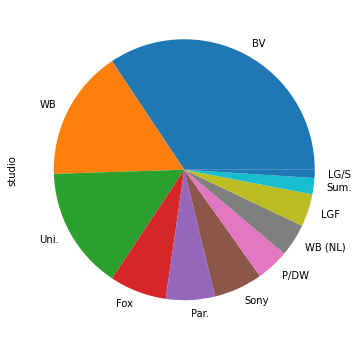

In [256]:
piee = dfsort.head(99)['studio'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

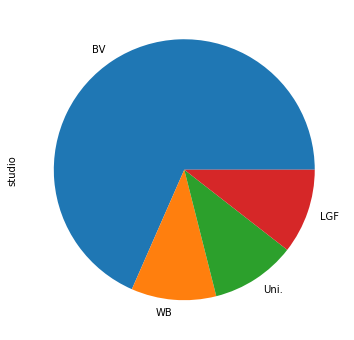

In [257]:
piee = dfsort.head(19)['studio'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

## Conclusion: 
Of the top 20 movies by domestic sales, more than half are produced by BV (13 out of 20). 
Of the top 100 movies by domestic sales, 34% are produced by BV, 16% produced by WB and 15% produced by Universal.
Movies produced by BV are the most likely to make high domestic sales. Movies produced by WB and Universal are likely to make high domestic sales too. 

[Text(0.5, 0, 'domestic gross sales'),
 Text(0, 0.5, 'movie name'),
 Text(0.5, 1.0, 'Top 20 movies by domestic sales')]

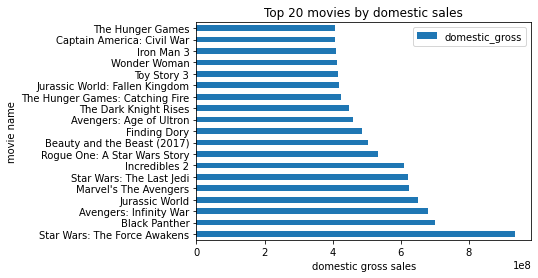

In [258]:
domestic = dfsort.head(19).plot.barh(x='title', y='domestic_gross')
domestic.set(xlabel='domestic gross sales', ylabel='movie name', title='Top 20 movies by domestic sales')

top 20 movies by domestic sales

In [259]:
df = df.sort_values(by='foreign_gross', ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 1805 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.8+ KB


foreign gross type is object. change type from onject to float to organize

In [260]:
df_new = df[df['foreign_gross'].notnull()]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 1805 to 2760
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            2037 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 95.5+ KB


In [261]:
df['foreign_gross'] = df['foreign_gross'].str.replace(',', '').astype(float)

In [262]:
dfsort2 = df.sort_values(by='foreign_gross', ascending=False)
dfsort2.head(19)

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


In [263]:
dfsort2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 328 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.8+ KB


[Text(0.5, 0, 'foreign gross sales'),
 Text(0, 0.5, 'movie name'),
 Text(0.5, 1.0, 'Top 20 movies by foreign sales')]

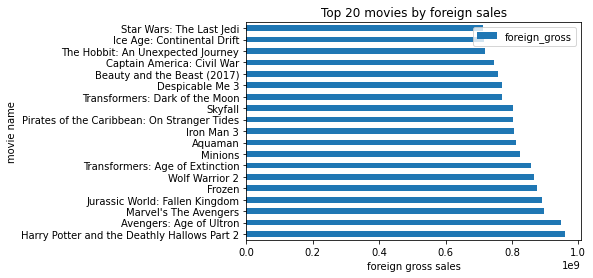

In [264]:
foreign = dfsort2.head(19).plot.barh(x='title', y='foreign_gross')
foreign.set(xlabel='foreign gross sales', ylabel='movie name', title='Top 20 movies by foreign sales')

top 20 movies by foreign sales

In [265]:
dfsort2.head(99)['studio'].value_counts()

BV         31
WB         15
Fox        12
Sony       10
Uni.        9
Par.        6
P/DW        5
WB (NL)     3
Sum.        2
LGF         2
LG/S        1
WGUSA       1
HC          1
Wein.       1
Name: studio, dtype: int64

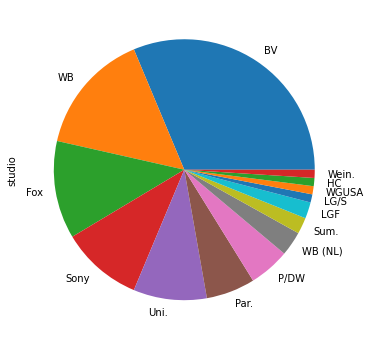

In [266]:
pie = dfsort2.head(99)['studio'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

In [267]:
dfsort2.head(19)['studio'].value_counts()

BV         8
Uni.       3
WB         2
HC         1
P/DW       1
Par.       1
Fox        1
WB (NL)    1
Sony       1
Name: studio, dtype: int64

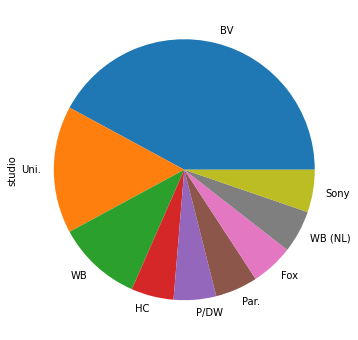

In [268]:
pie2 = dfsort2.head(19)['studio'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

Conclusion:¶
Of the top 20 movies by foriegn sales, 8 our of 20 are produced by BV. Of the top 100 movies by foreign sales, 31% are produced by BV, 15% produced by WB and 12% produced by Fox, 10% bu Sony and 9% produced by Universal. Movies produced by BV are the most likely to make high in foreign sales, followed by WB and Fox.


In [269]:
df1 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [270]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [271]:

combine = pd.merge(df1,dfsort2)
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  studio             2702 non-null   object 
 11  domestic_gross     2682 non-null   float64
 12  foreign_gross      1723 non-null   float64
 13  year               2703 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 316.8+ KB


In [272]:
combine = combine.sort_values(by='foreign_gross', ascending=False)
combine.head(19)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
1622,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,BV,459000000.0,946400000.0,2015
2561,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,Jurassic World: Fallen Kingdom,6.5,5995,Uni.,417700000.0,891800000.0,2018
97,148,[53],44363,en,Frozen,9.678,2010-02-05,Frozen,5.8,987,BV,400700000.0,875700000.0,2013
98,7886,"[16, 12, 10751]",109445,en,Frozen,26.183,2013-11-27,Frozen,7.3,9767,BV,400700000.0,875700000.0,2013
1318,11045,"[878, 28, 12]",91314,en,Transformers: Age of Extinction,20.961,2014-06-27,Transformers: Age of Extinction,5.8,4805,Par.,245400000.0,858600000.0,2014
1764,14351,"[10751, 16, 12, 35]",211672,en,Minions,9.338,2015-07-10,Minions,6.4,7343,Uni.,336000000.0,823400000.0,2015
2557,23824,"[28, 12, 14]",297802,en,Aquaman,38.102,2018-12-21,Aquaman,6.8,6155,WB,335100000.0,812700000.0,2018
968,7881,"[28, 12, 878]",68721,en,Iron Man 3,32.093,2013-05-03,Iron Man 3,6.9,14155,BV,409000000.0,805800000.0,2013
298,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,BV,241100000.0,804600000.0,2011
681,5193,"[28, 12, 53]",37724,en,Skyfall,19.270,2012-11-09,Skyfall,7.1,10441,Sony,304400000.0,804200000.0,2012


In [273]:
combine.head(19)['genre_ids'].value_counts()

[28, 12, 878]              3
[28, 12, 14]               2
[12, 14, 28]               2
[14, 12, 878, 28]          2
[12, 28, 878]              1
[16, 12, 10751]            1
[10751, 16, 12, 35]        1
[28, 878, 12]              1
[53]                       1
[878, 28, 12]              1
[28, 16, 35, 10751, 12]    1
[16, 35, 12, 10751]        1
[28, 12, 53]               1
[12, 28, 14]               1
Name: genre_ids, dtype: int64

MOVIE
Action          28
Adventure      12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37

In [274]:
to_remov = {'[53]':'thriller',
            "[28, 12, 878]": "action, adventure, science fiction", 
            "[28, 12, 14]": "action, adventure, fantasy",
            '[12, 14, 28]':'action, adventure, fantasy',
            '[14, 12, 878, 28]':'fantasy, adventure, science fiction, action',
            '[12, 28, 878]':'adventure, science fiction, action',
            '[16, 12, 10751]':'adventure, animation, family',
            '[10751, 16, 12, 35]':'adventure, animation, family, comedy',
            '[28, 878, 12]':'action, adventure, science fiction',
            '[878, 28, 12]': 'action, adventure, science fiction', 
            '[28, 16, 35, 10751, 12]':'action, animation, comedy, adventure, family',
            '[16, 35, 12, 10751]':'adventure, animation, family, comedy',
            '[28, 12, 53]':'action, adventure, thriller',
            '[12, 28, 14]':'action, adventure, fantasy',
           '[28, 12, 878, 14]':'fantasy, adventure, science fiction, action',
            '[28, 12, 14, 878]':'fantasy, adventure, science fiction, action',
            '[28, 16]':'action, animation',
            '[28, 12, 878, 53]':'Action, Adventure, Science Fiction, Thriller',
            '[28, 12, 16, 10751]':'Action, Adventure, Animation, Family',
            '[12, 16, 35, 10751]':'adventure, animation, family, comedy',
            '[28, 80, 18, 53]':'action, crime, drama, thriller',
            '[16, 10751, 35]':'animation, family, comedy',
            '[12, 14, 10752, 10749]':'adventure, fantasy, war, romance',
            '[28, 14]':'action, fantasy'
           }

for char in to_remov.keys():
    combine['genre_ids'] = combine['genre_ids'].replace(char, to_remov[char])
combine.head(19)['genre_ids'].value_counts()

action, adventure, fantasy                      5
action, adventure, science fiction              5
adventure, animation, family, comedy            2
fantasy, adventure, science fiction, action     2
adventure, animation, family                    1
adventure, science fiction, action              1
action, adventure, thriller                     1
action, animation, comedy, adventure, family    1
thriller                                        1
Name: genre_ids, dtype: int64

array([<AxesSubplot:ylabel='genre_ids'>], dtype=object)

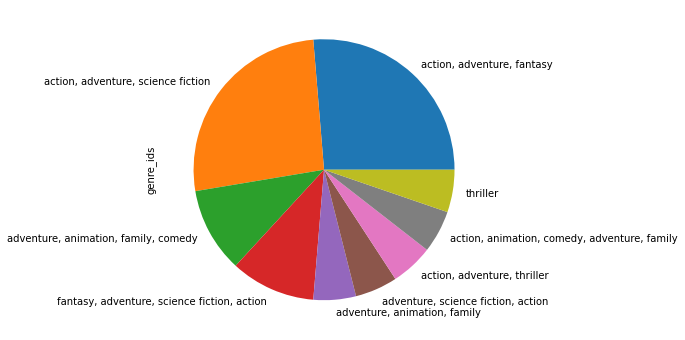

In [275]:
combine.head(19)['genre_ids'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

[Text(0.5, 0, 'foreign gross sales'),
 Text(0, 0.5, 'movie name'),
 Text(0.5, 1.0, 'Top 20 movies by foreign sales')]

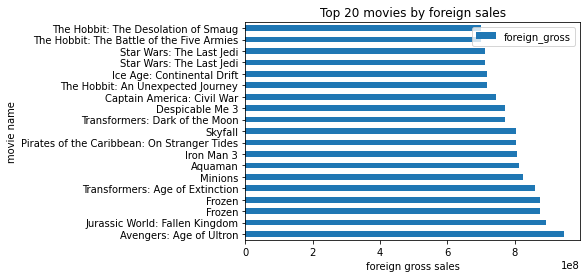

In [276]:
foreign2 = combine.head(19).plot.barh(x='title', y='foreign_gross')
foreign2.set(xlabel='foreign gross sales', ylabel='movie name', title='Top 20 movies by foreign sales')

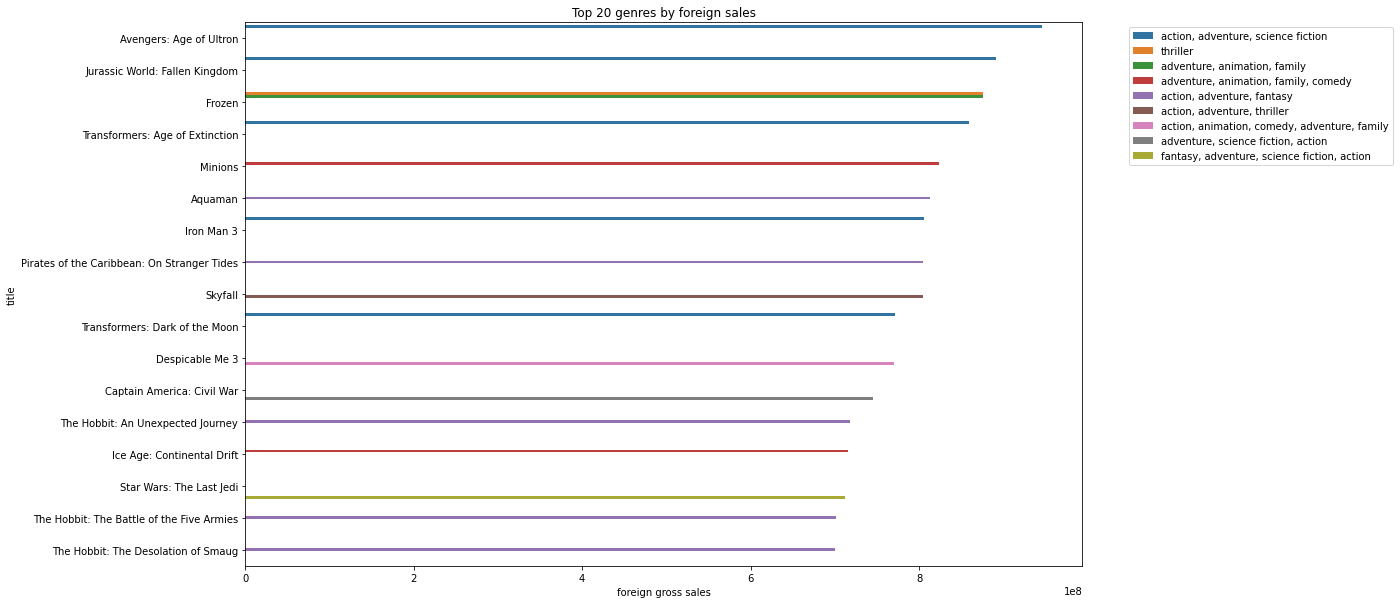

In [277]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=combine.head(19), y= 'title', x='foreign_gross', hue='genre_ids', orient='h')
plt.xlabel("foreign gross sales")
plt.ylabel("title")
plt.title("Top 20 genres by foreign sales")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

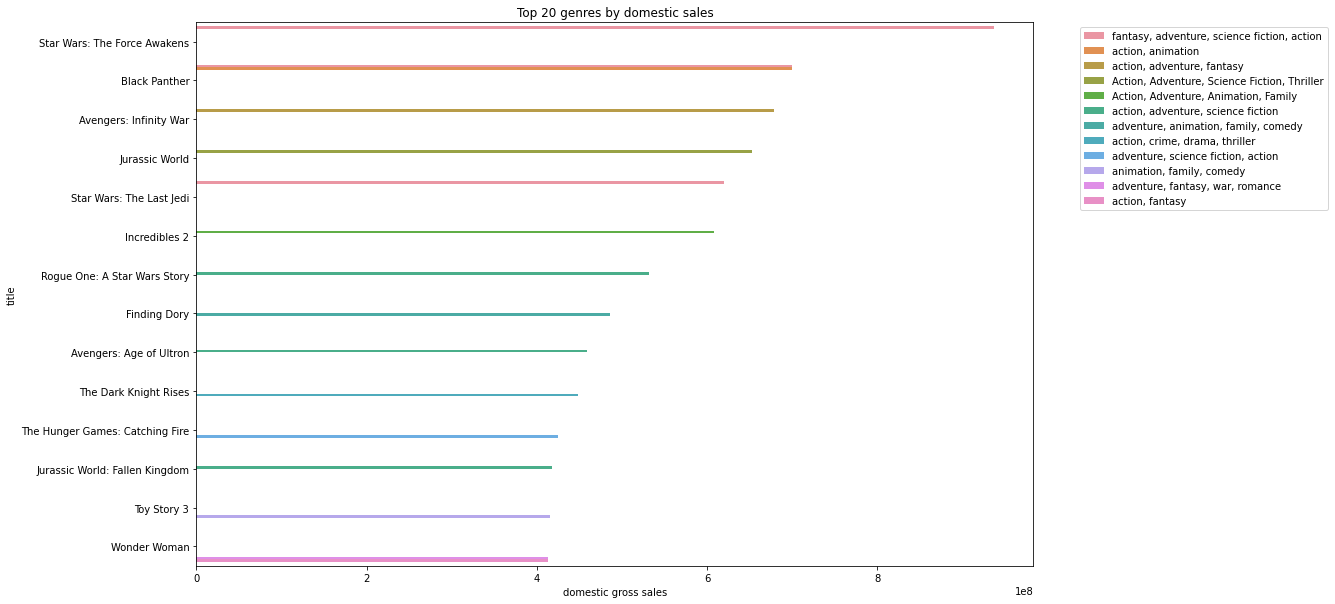

In [278]:
combine2 = combine.sort_values(by='domestic_gross', ascending=False)
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=combine2.head(19), y= 'title', x='domestic_gross', hue='genre_ids', orient='h')
plt.xlabel("domestic gross sales")
plt.ylabel("title")
plt.title("Top 20 genres by domestic sales")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [279]:
combine2.head(19)['genre_ids'].value_counts()

fantasy, adventure, science fiction, action     5
action, adventure, science fiction              4
action, adventure, fantasy                      1
action, fantasy                                 1
action, crime, drama, thriller                  1
adventure, animation, family, comedy            1
Action, Adventure, Animation, Family            1
Action, Adventure, Science Fiction, Thriller    1
animation, family, comedy                       1
adventure, fantasy, war, romance                1
action, animation                               1
adventure, science fiction, action              1
Name: genre_ids, dtype: int64

array([<AxesSubplot:ylabel='genre_ids'>], dtype=object)

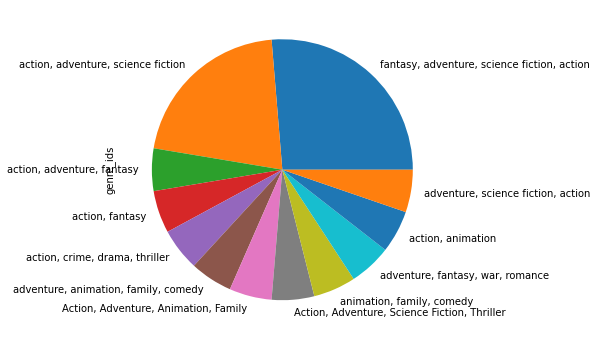

In [280]:
combine2.head(19)['genre_ids'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [281]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***